# Data Cleaning and Preprocessing

In [510]:
#imports section
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [511]:
# Load our dataset
df = pd.read_csv("5_letters.csv")
print(f"(rows, columns) = {df.shape}")

(rows, columns) = (2499, 5)


In [512]:
# Check if there's any duplicate rows, if there is, we drop them
num_duplicates = df.duplicated().sum()
print(f"number of duplicate rows: {num_duplicates}")

number of duplicate rows: 0


In [513]:
# Check if there's any rows with missing letters, if there is, we need to drop them
num_missing = df.isnull().any(axis = 1).sum()
print(f"number of rows with missing letters: {num_missing}")

number of rows with missing letters: 0


In [514]:
num_rows = df.shape[0]
# num_remove represents the number of rows to remove so our dataset has 1000 rows left
num_remove = num_rows - 1000

# Obtain num_remove number of random row indices to remove
indexes_to_drop = df.sample(n = num_remove, random_state = 42).index

df_1k = df.drop(indexes_to_drop)

df_1k = df_1k.reset_index(drop = True)

print(f"(rows, columns) = {df_1k.shape}")

(rows, columns) = (1000, 5)


# Exploratory Data Analysis

In [515]:
# Check the percentage of letters that are vowels
vowels = {'a', 'e', 'i', 'o', 'u'}
total_vowels = 0
for col in df_1k.columns:
    total_vowels += df_1k[col].map(lambda x: x in vowels).sum()
print(f"percentage of letters that are vowels: {(total_vowels/5000)*100:.2f}%")

percentage of letters that are vowels: 35.40%


In [516]:
bool_df = pd.DataFrame()

for col in df_1k.columns:
    bool_df[col] = df_1k[col].map(lambda x: x in vowels)

# Obtain the number of rows that has at least one vowel 
num_rows_with_vowel = bool_df.any(axis = 1).sum()

print(f"number of rows containing at least one vowel: {num_rows_with_vowel}")

number of rows containing at least one vowel: 998


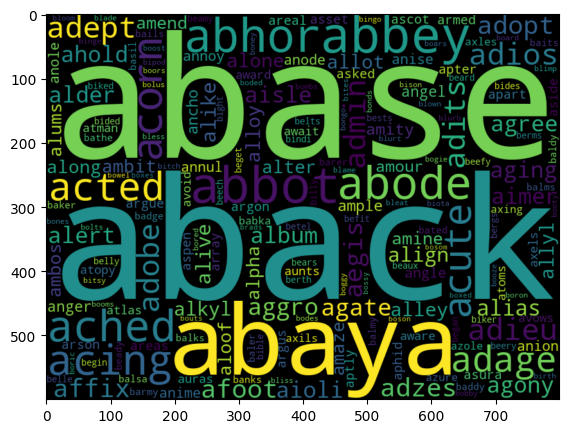

In [517]:
df = df.drop(indexes_to_drop)
complete_words = df.apply(lambda row: ''.join(row),axis=1)
combined_all_words = ' '.join(complete_words)

generate_word_cloud = WordCloud(width=800, height=600, background_color='black').generate(combined_all_words)

plt.figure(figsize=(10, 5))
plt.imshow(generate_word_cloud, interpolation='bilinear')
plt.show()

# The word cloud represents the frequency of words through their size.
#  For example, words like 'abase', 'aback', and 'abaya' appear larger than the others because they top the dataset.
#  Furthermore, the dataset organizes words in alphabetical order and indicates the percentage likelihood of each word's appearance in the passage.
 

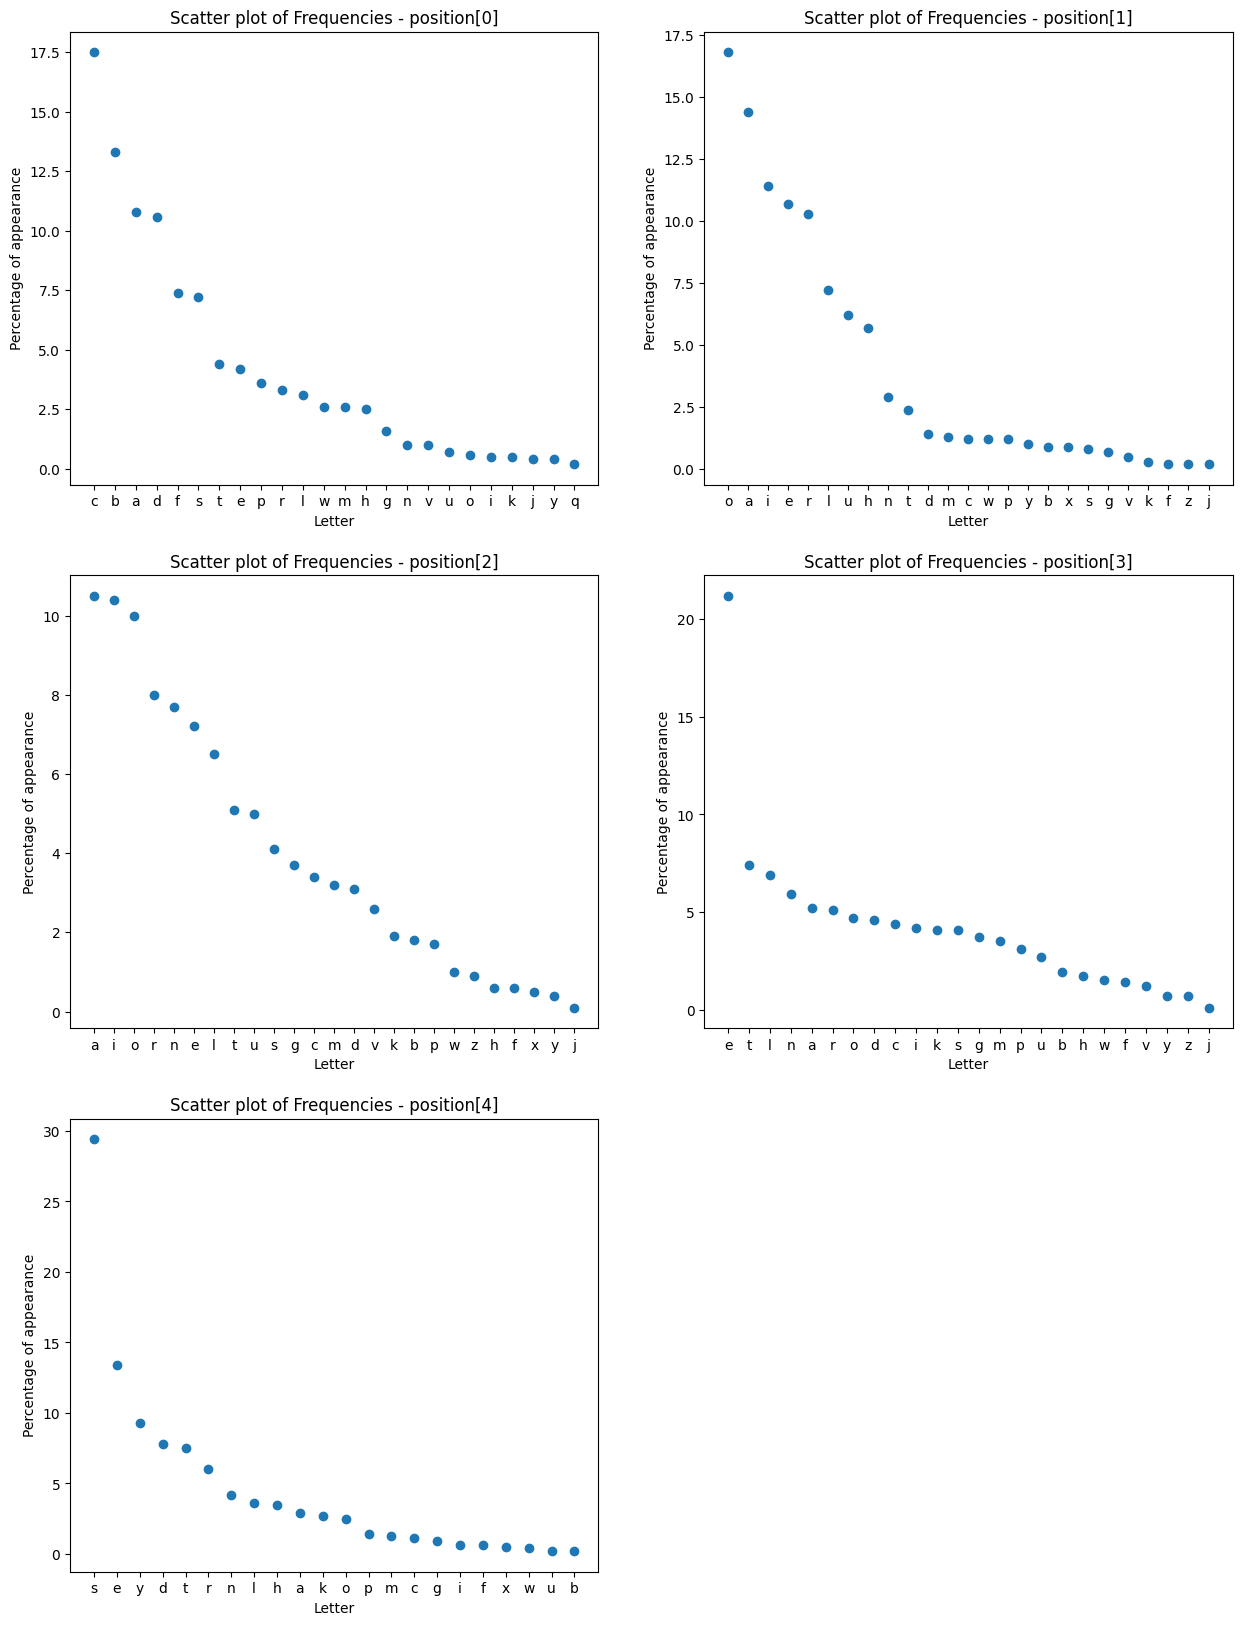

In [518]:
#scatterplot each letter at each position
five_columns = []
data_set_letter_and_frequence_each_column = []
for i in range(0,5):
    five_columns.append(df.iloc[:,i])

for i in range(5):
    frquencies = five_columns[i].value_counts()    
    data_set_letter_and_frequence_each_column.append(frquencies.reset_index())
    data_set_letter_and_frequence_each_column[i].columns = ['Letter', 'Frequency']
    data_set_letter_and_frequence_each_column[i]['Frequency'] = (data_set_letter_and_frequence_each_column[i]['Frequency'] / data_set_letter_and_frequence_each_column[i]['Frequency'].sum())*100
plt.figure(figsize=(15, 20))
for i in range(5):
    plt.subplot(3, 2, i + 1)
    plt.scatter(data_set_letter_and_frequence_each_column[i]['Letter'], data_set_letter_and_frequence_each_column[i]['Frequency'] )
    plt.title(f'Scatter plot of Frequencies - position{[i]}')
    plt.xlabel('Letter')
    plt.ylabel('Percentage of appearance')

#The scatter plot shows the percentage likelihood of a letter being present at a specific position.
#  For example, at position 0, the letter 'c' has the highest probability of appearing in a word.


